# CMPE482 - Spring 2021 - Assignment 4
**Student ID**: 2017402069 \
**Name**: Nilüfer Çetin \
**Date**: 26.05.2021

The following three questions are part of the Assignment 4 of CMPE482 course. It should be noted that these problems might have various solutions and the guidelines provided by the student might not be the most effective or quickest solutions to exist. 

Firstly, packages that can be used are imported,

In [1]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from random import randint
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import warnings
warnings.filterwarnings('ignore')

# Please Note that

For sake of aesthetic, the **Arrow Class of **Question 2** and the **Code Snippet of Question 3** is placed on the appendices at the end of this study. It is kindly recommended to the reader to first run the code on appendices at the end of the study before delving deeper.

# Question 1

Let

${A = \begin{bmatrix} 1 & 6 \\ 0 & -1 \\ -1 & -2 \end{bmatrix}}$

In [4]:
A = np.array([[1,6],[0,-1],[-1,-2]]) #matrix is constructed
A

array([[ 1,  6],
       [ 0, -1],
       [-1, -2]])

## Q1-Part a
Compute the **SVD** of ${A = U\Sigma V^T}$, without using a previous implementation of it (e.g. do not use numpy.linalg.svd). However, you can use a previous implementation of *eigendecomposition* to obtain your solution (e.g. numpy.linalg.eig). Print ${U}$, ${\Sigma}$ and ${V}$ in their full dimensions.

After this, compare your solution to that obtained by using numpy.linalg.svd(). 

The **Singular Value Decomposition** is a method of decomposing a real valued ${m x n}$ matrix into product of *3* different matrices with specific properties. ${U}$ and ${V}$ are **orthonormal square matrices of full rank** where ${U}$ is of ${m x m}$ and ${V}$ is of ${n x n}$. The column vectors of ${U}$ are said to be the **left-singular vectors** of the original matrix and the row vectors of ${V^T}$, or the column vectors of ${V}$ are said to be the **right-singular vectors** of the original matrix. Furthermore, ${\Sigma}$ is a ${m x n}$ matrix with ${\Sigma_{ii} = \sigma_i \geqslant 0, \Sigma_{ij} = 0}$ for ${i \neq j}$. ${\sigma_i}$ are called the **singular values** of the original matrix. Hence, to compute **SVD**, computing column vectors of ${U}$, ${u_i}$, column vectors of ${V}$, ${v_j}$ and the singular values in the diagonals of ${\Sigma}$ ${\sigma_k}$ are needed to be computed.

**Singular Value Decomposition** is a way of expressing a mapping from ${\mathbb{R}^n}$ to ${\mathbb{R}^m}$ by changing the basis in ${\mathbb{R}^n}$ and applying a scaling to ${\mathbb{R}^m}$ then to find the actual result by changing the basis again in ${\mathbb{R}^m}$. This seemingly complicated method has its applications in matrix approximations, least squares and many other machine learning functionalities.

There are several steps to obtain the **Singular Value Decomposition** of a matrix ${A}$ as outlined by [MML](https://mml-book.github.io/book/mml-book.pdf), of which mainly make use of another simpler decomposition called **Eigen Decomposition**.

1. Compute ${A^TA}$ and the **Eigen Decomposition** of ${A^TA = PDP^T}$. The matrix ${V}$ carrying the **right singular vectors** of ${A}$ in its column space is the ***same*** as the matrix ${P}$ carrying the **eigenvectors** of ${A^TA}$ in its column space. Hence, ${v_j}$s are found.


2. The **singular values** of ${A}$ will be carried in the matrix ${\Sigma}$ which can be easily derived from the matrix ${D}$ obtained by the previous **Eigen Decomposition**. The **singular values** are the square roots of eigenvalues of ${A^TA}$. So, the matrix ${\Sigma}$ can be obtained by taking the square root of the matrix ${D}$ and stacking row or column vectors of **zero** to it to fill the matrix to the size of ${A}$, that is ${m x n}$.


3. Since ${A = U\Sigma V^T}$ and ${V}$is orthonormal matrix, ${AV = U\Sigma}$. Because ${\Sigma}$ has values of **zero** on non-diagonal entries, each column vector of ${U}$ can be found as,

    ${u_i = \frac {Av_i}{\sigma_i}}$ which can be further stacked to find ${U}$.

Once the path to the solution is cleared the matrix ${A^TA}$ can be calculated.

${A^TA = \begin{bmatrix} 1 & 0 & -1 \\ 6 & -1 & -2 \end{bmatrix} \begin{bmatrix} 1 & 6 \\ 0 & -1 \\ -1 & -2 \end{bmatrix}}$

${A^TA = \begin{bmatrix} 2 & 8 \\ 8 & 41 \end{bmatrix}}$

In [5]:
AtA = A.T@A #constructing ATA
AtA

array([[ 2,  8],
       [ 8, 41]])

The **Eigen Decomposition** of the ${A^TA}$ can be found as ${PDP^T}$ where,

${P = \begin{bmatrix} -0.98 & -0.19 \\ 0.19 & -0.98 \end{bmatrix}}$

${D = \begin{bmatrix} 0.42 & 0 \\ 0 & 42.58 \end{bmatrix}}$

In [6]:
D, P = np.linalg.eig(AtA)           #performing eigen decomposition
D = np.array([[D[0],0],[0,D[1]]])   #arranging singular values in matrix
D

array([[ 0.42276109,  0.        ],
       [ 0.        , 42.57723891]])

In [7]:
P

array([[-0.98111381, -0.19343136],
       [ 0.19343136, -0.98111381]])

To check with the calculation,

In [8]:
P@D@P.T

array([[ 2.,  8.],
       [ 8., 41.]])

Once these are found, ${V}$ can be obtained as ${V = P}$ and for ${\Sigma}$, it is known that the size of the matrix will be ${3 x 2}$. Hence, the square root of ${D}$ is taken and a row vector of **zero** will be stacked onto it to find ${\Sigma}$. Nevertheless, in the algorithm given by [MML](https://mml-book.github.io/book/mml-book.pdf) the singular values in ${\Sigma}$ are arranged such that the ***highest*** singular value is on the top and the values are decreasing downwards. Consequently, the ${\Sigma}$ and the corresponding **right singular vectors** in ${V}$ will be arranged in going from ${D}$ to ${\Sigma}$ and ${P}$ to ${V}$,

${\Sigma = \begin{bmatrix} 6.52 & 0 \\ 0 & 0.65 \\ 0 & 0 \end{bmatrix}}$

${V =  \begin{bmatrix} -0.19 & -0.98 \\ -0.98 & 0.19 \end{bmatrix}}$

In [9]:
V = np.array((P[:,1], P[:,0])) #rearranging V to order the singular vectors
V

array([[-0.19343136, -0.98111381],
       [-0.98111381,  0.19343136]])

In [10]:
temp = np.sqrt(D)                                         #constructing Sigma
Sigma = np.array([[temp[1,1], 0], [0, temp[0,0]], [0,0]]) #arranging Sigma to order the singular values
Sigma

array([[6.52512367, 0.        ],
       [0.        , 0.65020081],
       [0.        , 0.        ]])

As a last step, to obtain the matrix ${U}$, ${u_1}$ and ${u_2}$ will be gathered seperately,

${u_1 = \frac {Av_1}{\sigma_1}}$

${u_2 = \frac {Av_2}{\sigma_2}}$

Nonetheless, in this case, ${U}$ is a ${3 x 3}$ matrix but there are *two* singular values and vectors at hand. To find ${U}$ in this case, the fact that the **eigenvectors** of ${AA^T}$ are the column vectors of ${U}$ will be used. This is actually a very fundamental property of **Singular Value Decomposition** and the reason behind all these relationships between matrices, vectors and decompositions will be discussed in **1b** while explaining the **Singular Value Decomposition Theory**. But for now, the matrix ${U}$ will be obtained from the **Eigen Decomposition** of the matrix ${AA^T}$ as,

${AA^T = SDS^T}$ where ${S}$ is orthonormal matrix and ${D}$ is the diagonal matrix that carries the same eigenvalues as that obtained by decomposition of ${A^TA}$ previously and one more eigenvalue since the dimension of ${AA^T}$ is one greateer than that of ${A^TA}$, which is another very important fact for the theory behind **SVD**. 

${AA^T = \begin{bmatrix} 1 & 6 \\ 0 & -1 \\ -1 & -2 \end{bmatrix} \begin{bmatrix} 1 & 0 & -1 \\ 6 & -1 & -2 \end{bmatrix}}$

${AA^T = \begin{bmatrix} 37 & -6 & -13 \\ -6 & 1 & 2 \\ -13 & 2 & 5\end{bmatrix}}$

When the matrix ${AA^T}$ is decomposed into its eigenvectors and values, the matrix ${S}$ can be found as,

${S = \begin{bmatrix} -0.93 & 0.28 & -0.24 \\ 0.15 & -0.3 & -0.94 \\ 0.33 & 0.91 & -0.24\end{bmatrix}}$

In [11]:
D1, S = np.linalg.eig(A@A.T) #eigen decomposition of AAT
S

array([[-0.93180061,  0.2760291 , -0.23570226],
       [ 0.15035942, -0.2974948 , -0.94280904],
       [ 0.33036293,  0.9139501 , -0.23570226]])

To transfer ${S}$ into ${U}$, the arrangement of *eigenvalues* in ${D}$ is needed to be checked so that the ***singular values***, ***right singular vectors*** and ***left singular vectors*** are sequenced in the **same** order. Once ${D}$ is examined,

In [12]:
D1

array([4.25772389e+01, 4.22761092e-01, 1.92879300e-15])

It can be found that first two eigenvalues are ordered in a decreasing fashion and are the **same** as those of ${AA^T}$. Because of this, ${U}$ can be directly found as **equal** to the ${S}$. So, 

${U = \begin{bmatrix} -0.93 & 0.28 & -0.24 \\ 0.15 & -0.3 & -0.94 \\ 0.33 & 0.91 & -0.24\end{bmatrix}}$

To check with the solution, it can be calculated whether if ${U\Sigma V^T}$ equals ${A}$.

In [13]:
U = S
np.round(U@Sigma@V.T, 6)

array([[ 1.,  6.],
       [-0., -1.],
       [-1., -2.]])

Once again,

${U = \begin{bmatrix} -0.93 & 0.28 & -0.24 \\ 0.15 & -0.3 & -0.94 \\ 0.33 & 0.91 & -0.24\end{bmatrix}}$

${\Sigma = \begin{bmatrix} 6.52 & 0 \\ 0 & 0.65 \\ 0 & 0 \end{bmatrix}}$

${V =  \begin{bmatrix} -0.19 & -0.98 \\ -0.98 & 0.19 \end{bmatrix}}$

And,

${U\Sigma V^T = A}$

${\begin{bmatrix} -0.93 & 0.28 & -0.24 \\ 0.15 & -0.3 & -0.94 \\ 0.33 & 0.91 & -0.24\end{bmatrix} \begin{bmatrix} 6.52 & 0 \\ 0 & 0.65 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} -0.19 & -0.98 \\ -0.98 & 0.19 \end{bmatrix} = \begin{bmatrix} 1 & 6 \\ 0 & -1 \\ -1 & -2 \end{bmatrix}}$

Once these are found, the procedure enabled by *numpy.linalg.svd()* can be performed as,

In [14]:
np.linalg.svd(A) #performing SVD

(array([[ 0.93180061, -0.2760291 ,  0.23570226],
        [-0.15035942,  0.2974948 ,  0.94280904],
        [-0.33036293, -0.9139501 ,  0.23570226]]),
 array([6.52512367, 0.65020081]),
 array([[ 0.19343136,  0.98111381],
        [ 0.98111381, -0.19343136]]))

On the [documentation page](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html), it is mentioned that the function returns **three** arrays. The first array is the ${U}$ matrix of **SVD** and the third array is the ${V^T}$ matrix of **SVD**. The second array returned is actually a ${1-}$dimensional vector where the singular values are ordered in decreasing fashion, this vector actually represents the *non-zero* entries of ${\Sigma}$. 

Since ${V}$ is an orthonormal ${2x2}$ matrix, ${V}$ and the returned ${V^T}$ are the **same** in this case. But, both the ${U}$ and the ${V}$ returned by the function are the negative of what have been found previously. However, multiplying by negative one two times gives the same result so this is not a problem. When the matrices and values are compared, it can be seen that the solution provided by the study and the function is the **same**.

## Q1-Part b
For an ${A}$ with real elements, we can be sure that there must exist an orthogonal ${U}$ and ${V}$. Why should this be true?

This can actually be explained by the relationship between ${AA^T}$ and ${A^TA}$ with ${U}$ and ${V}$. The existence and special characteristics of ${AA^T}$ and ${A^TA}$ play important role in the **Singular Value Decomposition**. To introduce the centrality and association of ${AA^T}$ and ${A^TA}$ to the **Singular Value Decomposition**, the ***SVD Theorem*** can be illustrated.

First of all, *for all real valued matrix ${A}$, there is **always** a symmetric positive-definite matrix ${A^TA}$* on which **Eigen Decomposition** can be performed, where ${A^TA = PDP^T}$ with **orthonormal** ${P}$, which is important for the theorem.

If the **SVD** is assumed to exist for the matrix at hand then by **SVD**,

${A^TA = (U\Sigma V^T)^T(U\Sigma V^T) = V\Sigma^T U^T U\Sigma V^T = V\Sigma^T \Sigma V^T = \begin{bmatrix} \sigma_1^2 & 0 & 0\\ 0 & \sigma_2^2 & 0\\.& . & . & \\0 & 0 & \sigma_n^2\end{bmatrix}}$

As ${A^TA = PDP^T}$ and ${A^TA = V\sigma^2 V^T}$,

${V^T = P^T}$ and ${\sigma_i^2 = \lambda_i}$ where ${\lambda_i}$ is the ${i^{th}}$ diagonal entry of ${D}$.

This concludes the part with the existence of the **right singular vectors** of ${A}$ and their relationship to ${A^TA}$. Because the eigenvectors of the matrix ${A^TA}$ are **orthonormal**, the matrix ${V}$ is also orthonormal. Similarly, *for all real valued matrix ${A}$ there **always** exist a symmetric positive-definite matrix ${AA^T}$* on which **Eigen Decomposition** can be performed, where ${AA^T = SDS^T}$ with orthonormal ${S}$ and diagonal ${D}$ carrying the eigenvalues. The non-zero entries of the matrices ${D}$ are the ***same*** because the eigenvalues of ${AA^T}$ and ${A^TA}$ are the ***same***, proven in a different theorem.

Again if **SVD** is assumed to exist for the matrix at hand then by the existence of this decomposition,

${AA^T = (U\Sigma V^T)(U\Sigma V^T)^T =  U\Sigma V^T V\Sigma^T U^T = U\Sigma \Sigma^T U^T = \begin{bmatrix} \sigma_1^2 & 0 & 0\\ 0 & \sigma_2^2 & 0\\.& . & . & \\0 & 0 & \sigma_n^2\end{bmatrix}}$

As ${AA^T = SDS^T}$ and ${AA^T = U\sigma^2 U^T}$,

${U = S}$ and ${\sigma_i^2 = \lambda_i}$ where ${\lambda_i}$ is the ${i^{th}}$ diagonal entry of ${D}$.

Hence, the existence of **left singular vectors** in ${U}$ and their association to ${AA^T}$ therefore them being **orthonormal** is concluded. That leaves the part with ${\Sigma}$, the **singular values**.

For this, the connection between ${U}$ and ${V}$ should be demonstrated. It is easy to show that not only ${v_1, v_2, ..., v_n}$ form an orthogonal basis but also ${Av_1, Av_2, ..., Av_n}$ form orthogonal basis too. Which can be shown by,

${(Av_i)^T(Av_j) = v_i^TA^TAv_j = v_i^T\lambda_jv_j = \lambda_jv_i^Tv_j = 0}$

Then, ${u_i}$ can be found by,

${u_i = \frac{Av_i}{||Av_i||} = \frac{1}{\sqrt{\lambda_i}} Av_i = \frac{1}{\sigma_i} Av_i}$

Hence,

${Av_i = \sigma_i u_i}$ and compressed,

${AV = \Sigma U}$

In short, it is proven that for a matrix ${A}$ with real valued entries, ${AA^T}$ and ${A^TA}$ are the matrices that are symmetric, positive semi-definite and share the **same** eigen values which links them through ${U}$ and ${V}$ in **SVD**. The foundation that there always exist ${U}$ and ${V}$ orthonormal matrices is related to the special characteristics of the eigen vectors of these matrices. Their eigen vectors are **orthonormal**, which makes ${U}$ and ${V}$ **orthonormal** also.

## Q1-Part c
Using your SVD results and using ***only the largest singular value***, create a rank-one approximation of ${A}$ called ${\hat A}$. Show that your approximation error conforms to that predicted by the Eckhart-Young Theorem in [Pg. 131, Theorem 4.25](https://mml-book.github.io/book/mml-book.pdf).

As mentioned before, **Singular Value Decomposition** is very helpful in *matrix approximation*. From a more concrete perspective the approximation can be thought of as expressing a full rank matrix with combination of rank at most k matrices. To put it differently, the approximation ${\hat A}$ will be a projection of ${A}$ from ${\mathbb{R}^2}$ to the ${1-}$dimensional space ${\mathbb{R}^1}$, where ${\hat A}$ will reside. In general a **rank k approximation** ${\hat A}$ to the decomposed matrix ${A}$, without losing the generality, can be written as,

${\hat A(k) = \sum \limits_{i=1} ^ k {\sigma_iu_iv_i^T} = \sum \limits_{i=1} ^ k {\sigma_iA_i}}$ which is actually a function of the approximation order ***k***.

For the ${A}$ at hand, the ***largest singular value*** is, ${\sigma_1 = 6.52}$ and the corresponding ***left and right singular vectors*** are ${u_1 = \begin{bmatrix} -0.93 \\ 0.15 \\ 0.33\end{bmatrix}}$ and ${v_1 = \begin{bmatrix} -0.19 \\ -0.98\end{bmatrix}}$

So, ${\hat A(1) = 6.52  \begin{bmatrix} -0.93 \\ 0.15 \\ 0.33\end{bmatrix} \begin{bmatrix} -0.19 & -0.98\end{bmatrix}}$

${\hat A(1) = \begin{bmatrix} 1.176 & 5.965 \\ -0.190 & -0.963 \\ -0.417 & -2.115 \end{bmatrix}}$

In [15]:
Ahat = np.expand_dims(U[:,0],1)@np.expand_dims(V[:,0].T,0)*(Sigma[0,0]) #creating Ahat
Ahat

array([[ 1.17608476,  5.96528403],
       [-0.18977818, -0.96258431],
       [-0.41697205, -2.1149468 ]])

The [Eckhart-Young Theorem](https://mml-book.github.io/book/mml-book.pdf) reveals the amount of approximation error or the information lost in approximating the original matrix from a lower dimensional space by **Singular Value Decomposition**. According to the theorem, this amount can be found as,

${||A - \hat A(k)||_2 = \sigma_{k+1}}$

Which in this case can be found as ${\sigma_2 = 0.65}$

In [16]:
err = np.linalg.norm(A-Ahat) #finding the error vector and its norm
err

0.650200808706055

The difference between the *error* and ${\sigma_2}$ can be viewed as approximately ${0}$,

In [17]:
err-Sigma[1,1] #comparing

4.6629367034256575e-15

# Question 2

In this question, we will examine the transformation done by our matrix in a more detailed fashion, similar to Figure 4.8 (Pg. 120) in [MML](https://mml-book.github.io/book/mml-book.pdf). We will use the fact that ${Ax = U\Sigma V^Tx}$.

## Q2-Part a
Create 12 two-dimensional unit vectors. They have to start from ${x_1 = (1, 0)}$ and they should be ${30}$ degrees apart each, and numbering should go *counterclockwise*. Stack them horizontally inside a ${2 x 12}$ matrix called ${X}$. Print ${X}$.

In [18]:
deg30 = np.array([[math.cos(math.radians(30)), -(math.sin(math.radians(30)))], 
    [math.sin(math.radians(30)), math.cos(math.radians(30))]])  #rotation matrix for each iteration

last = np.array([[1],[0]]) #first vector
X = last                   #X

for i in range(11):
    last = deg30@last         #chaning last vector
    X = np.hstack((X, last))  #adding the vector to X
    
X

array([[ 1.00000000e+00,  8.66025404e-01,  5.00000000e-01,
         2.07170437e-16, -5.00000000e-01, -8.66025404e-01,
        -1.00000000e+00, -8.66025404e-01, -5.00000000e-01,
        -7.02785277e-16,  5.00000000e-01,  8.66025404e-01],
       [ 0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
         1.00000000e+00,  8.66025404e-01,  5.00000000e-01,
         4.36652126e-16, -5.00000000e-01, -8.66025404e-01,
        -1.00000000e+00, -8.66025404e-01, -5.00000000e-01]])

## Q2-Part b
Plot all 2-dimensional vectors in ${X}$ on the ${2-}$dimensional plane.

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

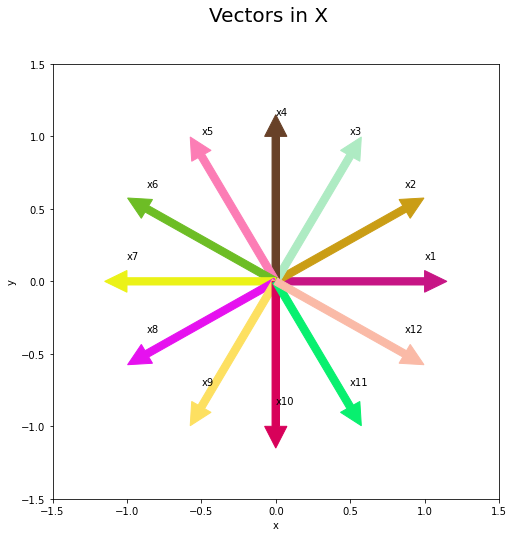

In [19]:
#choosing colors
colors = ['mediumvioletred']
for i in range(11): 
    colors.append('#%06X' % randint(0, 0xFFFFFF))

fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Vectors in X", size=20)
for i in range(12):    #iterating in X
    x = X[:,i]
    ax.arrow(0, 0, dx=float(x[0]), dy=float(x[1]), width=0.05, head_width=0.15, head_length=0.15, color=colors[i]) #drawing vector
    ax.text(x=x[0], y=x[1] + 0.15, s='x' + str(i+1))      #adding text
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set(ylabel='y', xlabel='x')

## Q2-Part c
Multiply each vector with ${V^T}$. Plot the resulting vectors on the ${2-}$dimensional plane.

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

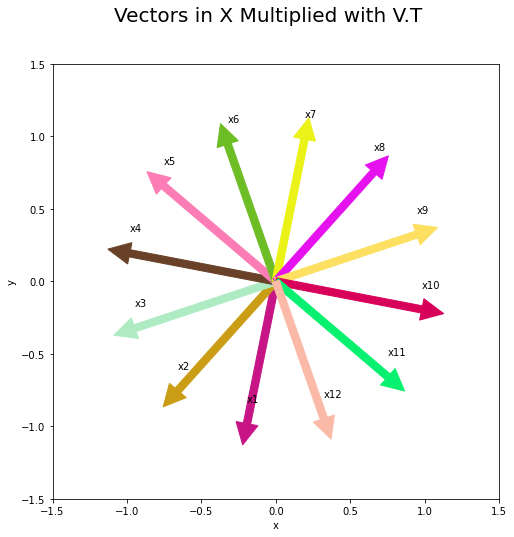

In [20]:
trans = np.zeros((3,12))   #a new matrix to hold the images under transformation
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Vectors in X Multiplied with V.T", size=20)
for i in range(12):
    x = V.T@X[:,i]      #multipplying
    trans[0, i] = x[0]  #transferring to trans
    trans[1, i] = x[1]  #transferring to trans
    ax.arrow(0, 0, dx=float(x[0]), dy=float(x[1]), width=0.05, head_width=0.15, head_length=0.15, color=colors[i]) #drawing
    ax.text(x=x[0], y=x[1] + 0.15, s='x' + str(i+1)) #text
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set(ylabel='y', xlabel='x')

As expected, ${V^T}$ performs a *basis change* in the **same** ${2-}$dimensional space. Since this matrix is an orthonormal matrix, the vectors are simply rotated by some angle defined by the columns of ${V^T}$, as proven in [Assignment 2](https://nilufercetin.github.io/CMPE482-Applications-of-Linear-Algebra/files/2017402069_cetin_cmpe482_assignment_2.html) rotation matrices in ${2-}$D have **orthonormal columns** giving them the *rotation specific features*.

## Q2-Part d
Take the results of **2c** and multiply each vector with ${\Sigma}$, and plot each vector on the ${3-}$dimensional plane.

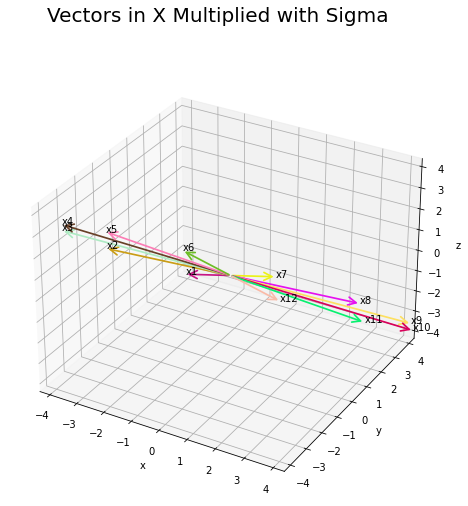

In [21]:
fig = plt.figure(figsize=(8,8))
fig.suptitle("Vectors in X Multiplied with Sigma", size=20)
ax = plt.axes(projection='3d')
ax.set_xlim([-4.2, 4.2])
ax.set_ylim([-4.2, 4.2])
ax.set_zlim([-4.2, 4.2])
ax.set(zlabel='z', ylabel='y', xlabel='x')
for i in range(12):
    x = Sigma@trans[0:2,i] #multiplying
    trans[0, i] = x[0]     #transferring to trans
    trans[1, i] = x[1]     #transferring to trans
    trans[2, i] = x[2]     #transferring to trans
    ax.add_artist(Arrow3D([0,x[0]], [0,x[1]],[0,0], mutation_scale=20, lw=1.7, arrowstyle="->", color=colors[i])) #drawing
    ax.text(x=x[0], y=x[1], z=0, s='x' + str(i+1))

As ${\Sigma}$ does have ${0}$ values on its last row, the ${z-}$dimension becomes ${0}$ valued for these vectors as before. By multiplying with the diagonal ${\Sigma}$ with entries ${6.52}$ and ${0.65}$, the vectors are expanded in the ${x-}$dimension while being compressed in the ${y-}$dimension.

In short, it can be said that ${\Sigma}$ maps the vectors in ${2-}$dimensions to ${2-}$dimensional vectors in ${3-}$dimensions while changing their length through these dimensions.

In [22]:
trans

array([[-1.26216354, -4.29401017, -6.17528023, -6.40188895, -4.91311669,
        -2.10787878,  1.26216354,  4.29401017,  6.17528023,  6.40188895,
         4.91311669,  2.10787878],
       [-0.63792099, -0.48957117, -0.21004115,  0.12576923,  0.42787984,
         0.6153404 ,  0.63792099,  0.48957117,  0.21004115, -0.12576923,
        -0.42787984, -0.6153404 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

## Q2-Part e
Take the results of **2d** and multiply each vector with ${U}$, and plot each vector on the ${3-}$dimensional plane.

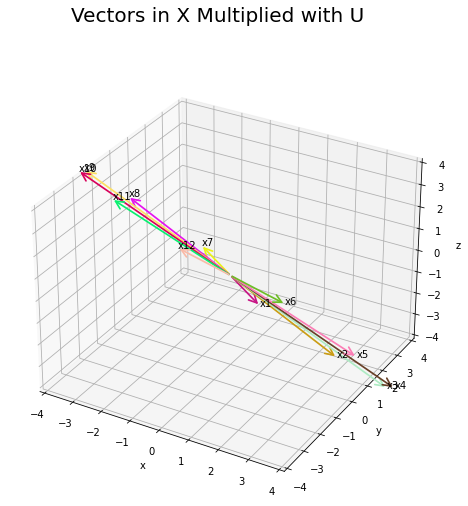

In [23]:
fig = plt.figure(figsize=(8,8))
fig.suptitle("Vectors in X Multiplied with U", size=20)
ax = plt.axes(projection='3d')
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set(zlabel='z', ylabel='y', xlabel='x')
for i in range(12):
    x = U@trans[:,i]   #multiplying
    trans[0, i] = x[0] #transferring to trans
    trans[1, i] = x[1] #transferring to trans
    trans[2, i] = x[2] #transferring to trans
    ax.add_artist(Arrow3D([0,x[0]], [0,x[1]],[0,x[2]], mutation_scale=20, lw=1.7, arrowstyle="->", color=colors[i])) #drawing
    ax.text(x=x[0], y=x[1], z=x[2], s='x' + str(i+1))

The matrix ${U}$ is also an **orthonormal** matrix. ${U}$ operates in ${3-}$dimensional space, mapping a vector in ${3-}$D to another vector in ${3-}$D. This matrix performs a **basis change** just like ${V}$. By multiplying with ${U}$, an information is provided to the vectors in a new ${3^{rd}}$ dimension. 

Nonetheless, when visualized the resulting vectors fall into the **same*** plane in ${3-}$D. This means that the information formed in the ${3^{rd}}$ dimension is some replicate of those coming from the previous dimensions. This results from the fact that the vectors multiplied with ${\Sigma}$ had information in ${2}$ dimensions. Hence, the ***rank*** of the resulting matrix of vectors is ${2}$.

In [24]:
np.linalg.matrix_rank(trans)

2

## Q2-Part f
Recall ${\hat A}$ from **1c**. Let ${\hat A = U\hat{\Sigma}V^T}$, where ${U}$ and ${V^T}$ are ***same*** as above and ${\hat{\Sigma}}$ is the version of ${\Sigma}$ where all elements are *0* besides the first singular value. *Plot* all 4 stages you plotted above for ${\hat A}$ as well.

The matrix ${\hat \Sigma}$ can be found as,

${\hat \Sigma = \begin{bmatrix} 6.52 & 0 \\ 0 & 0 \\ 0 & 0 \end{bmatrix}}$

The vectors in ${X}$ are,

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

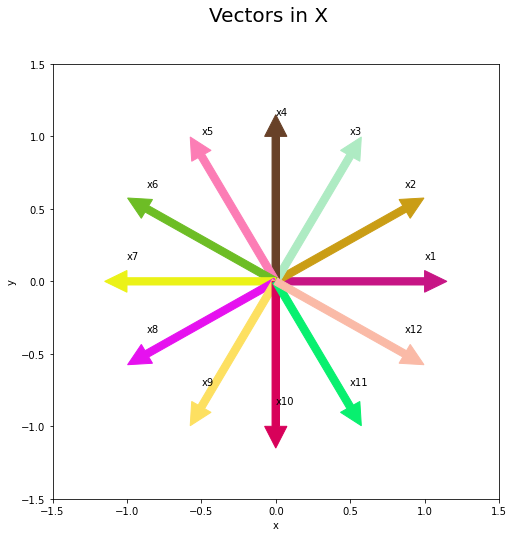

In [25]:
SigmaH = np.array([[Sigma[0,0],0],[0,0],[0,0]]) #constructing Sigma Hat

fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Vectors in X", size=20)
for i in range(12):  #iteration in X
    x = X[:,i]
    ax.arrow(0, 0, dx=float(x[0]), dy=float(x[1]), width=0.05, head_width=0.15, head_length=0.15, color=colors[i]) #drawing
    ax.text(x=x[0], y=x[1] + 0.15, s='x' + str(i+1))
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set(ylabel='y', xlabel='x')

When each vector is multiplied with ${V^T}$,

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

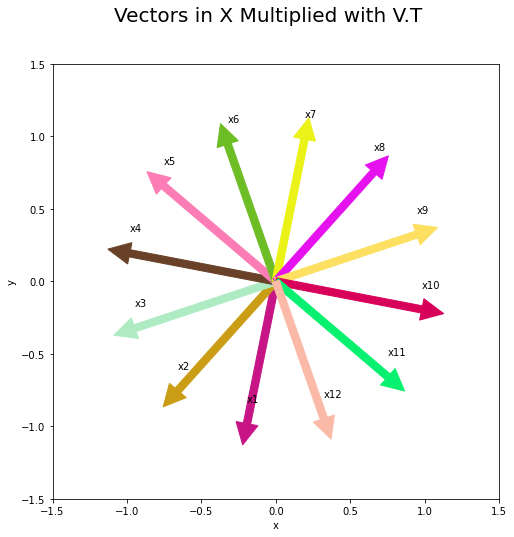

In [26]:
apr_trans = np.zeros((3,12))     #creating matrix to store the transformations by Ahat
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Vectors in X Multiplied with V.T", size=20)
for i in range(12):
    x = V.T@X[:,i]          #multiplying
    apr_trans[0, i] = x[0]  #transferring to apr_trans
    apr_trans[1, i] = x[1]  #transferring to apr_trans
    ax.arrow(0, 0, dx=float(x[0]), dy=float(x[1]), width=0.05, head_width=0.15, head_length=0.15, color=colors[i]) #drawing
    ax.text(x=x[0], y=x[1] + 0.15, s='x' + str(i+1))
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set(ylabel='y', xlabel='x')

Since ${V^T}$ is the **same** the resulting image is the **same**.

When the resulting vectors are multiplied with ${\hat \Sigma}$,

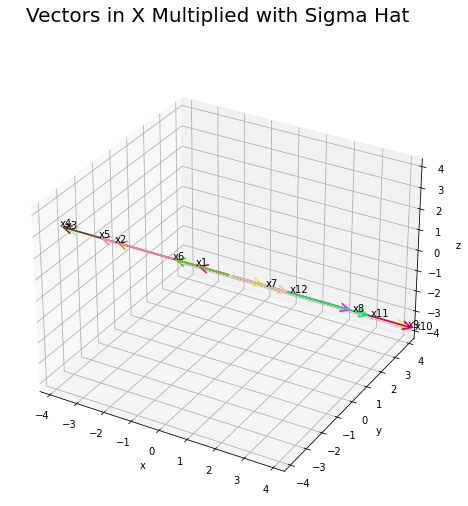

In [27]:
fig = plt.figure(figsize=(8,8))
fig.suptitle("Vectors in X Multiplied with Sigma Hat", size=20)
ax = plt.axes(projection='3d')
ax.set_xlim([-4.2, 4.2])
ax.set_ylim([-4.2, 4.2])
ax.set_zlim([-4.2, 4.2])
ax.set(zlabel='z', ylabel='y', xlabel='x')
for i in range(12):
    x = SigmaH@apr_trans[0:2,i]  #multiplying
    apr_trans[0, i] = x[0]       #transferring to apr_trans
    apr_trans[1, i] = x[1]       #transferring to apr_trans
    apr_trans[2, i] = x[2]       #transferring to apr_trans
    ax.add_artist(Arrow3D([0,x[0]], [0,x[1]],[0,0], mutation_scale=20, lw=1.7, arrowstyle="->", color=colors[i])) #drawing
    ax.text(x=x[0], y=x[1], z=0, s='x' + str(i+1))

The ${\hat \Sigma}$ is different than the original ${\Sigma}$ in that it provides less amount of information for the mapping. The vectors are again mapped into the ${3-}$dimensional space but the information they hold at the ${y-}$dimension is now completely lost as this row is completely zero and the **singular value** is not taken into consideration.

The fact that those vectors only carry information in ${1}$ dimension can be seen by,

In [28]:
apr_trans

array([[-1.26216354, -4.29401017, -6.17528023, -6.40188895, -4.91311669,
        -2.10787878,  1.26216354,  4.29401017,  6.17528023,  6.40188895,
         4.91311669,  2.10787878],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

When the resulting vectors are multiplied with ${U}$,

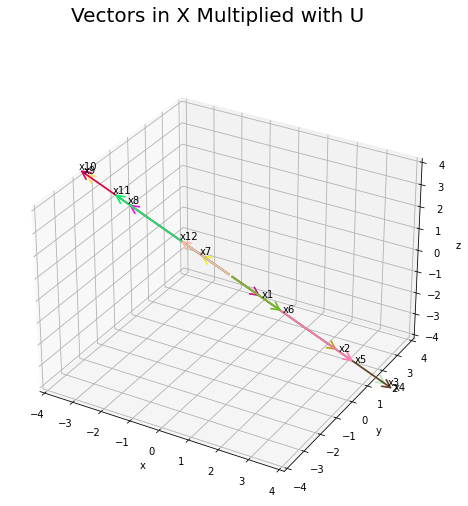

In [29]:
fig = plt.figure(figsize=(8,8))
fig.suptitle("Vectors in X Multiplied with U", size=20)
ax = plt.axes(projection='3d')
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set(zlabel='z', ylabel='y', xlabel='x')
for i in range(12):
    x = U@apr_trans[:,i]    #multiplying
    apr_trans[0, i] = x[0]  #transferring to apr_trans
    apr_trans[1, i] = x[1]  #transferring to apr_trans
    apr_trans[2, i] = x[2]  #transferring to apr_trans
    ax.add_artist(Arrow3D([0,x[0]], [0,x[1]],[0,x[2]], mutation_scale=20, lw=1.7, arrowstyle="->", color=colors[i])) #drawing
    ax.text(x=x[0], y=x[1], z=x[2], s='x' + str(i+1))

It got even harder to visualize the final vectors because the vectors are now different from each other only in ${1}$ dimension. Compared to the process with the matrix ${A}$ itself, the process with matrix ${\hat A}$ give result to vectors that are not just in the **same** *plane* but are also in the **same** or **opposite** direction. Consequently it can be stated that the information coming from the vectors is now limited to information in only one direction, which has been the case with the images of vectors after being multiplied with ${\hat \Sigma}$. In line with this understanding the **rank** of the final matrix can be found as ${1}$.

In [30]:
np.linalg.matrix_rank(apr_trans)

1

## Q2-Part g
Compare the last images you produced with ${A}$ and ${\hat A}$. In what sense vectors produced by multiplying ${\hat A}$ can be said to produce a ***“summary”*** of those produced by ${A}$? Comment.

The final transformations can be illustrated again,

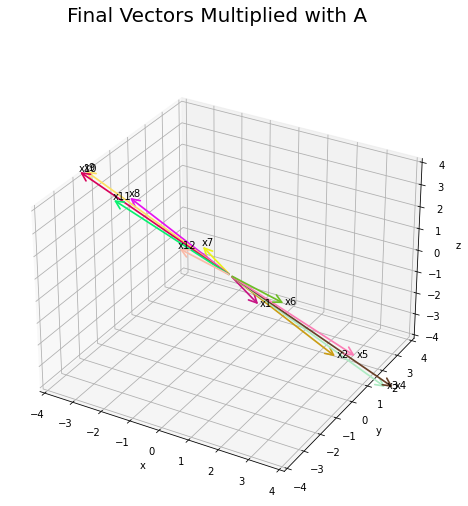

In [31]:
fig = plt.figure(figsize=(8,8))
fig.suptitle("Final Vectors Multiplied with A", size=20)
ax = plt.axes(projection='3d')
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set(zlabel='z', ylabel='y', xlabel='x')
for i in range(12):
    ax.add_artist(Arrow3D([0,trans[0,i]], [0,trans[1,i]],[0,trans[2,i]], mutation_scale=20, lw=1.7, arrowstyle="->", color=colors[i]))
    ax.text(x=trans[0,i], y=trans[1,i], z=trans[2,i], s='x' + str(i+1))

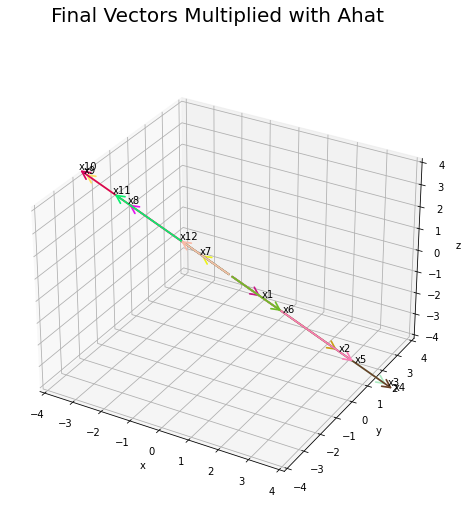

In [32]:
fig = plt.figure(figsize=(8,8))
fig.suptitle("Final Vectors Multiplied with Ahat", size=20)
ax = plt.axes(projection='3d')
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set(zlabel='z', ylabel='y', xlabel='x')
for i in range(12):
    ax.add_artist(Arrow3D([0,apr_trans[0,i]], [0,apr_trans[1,i]],[0,apr_trans[2,i]], mutation_scale=20, lw=1.7, arrowstyle="->", color=colors[i]))
    ax.text(x=apr_trans[0,i], y=apr_trans[1,i], z=apr_trans[2,i], s='x' + str(i+1))

When the two images are compared with each other, it can be easily seen that the first image has an additional dimension on top of the second one forming a plane. In other words, the vectors reside in **two different dimensions** after they are multiplied with ${A}$. Nevertheless, they reside in **just one of this two dimensions** once multiplied with ${\hat A}$. 

This is related to the process in approximating the matrix ${A}$. Normally, there are **two** singular values and corresponding singular vectors that make ${A}$, the bigger  singular value and its associated singular vector holds as much information as possible. Since there is **only one** singular value in the approximation ${\hat A}$, the second right singular vector coming from ${V}$ is lost in the process of going from ${V^Tx}$ to ${\hat \Sigma V^Tx}$. Consequently while approximating the matrix ${A}$, some of its functionality is also **lost**, ie. its ability to provide information on a second dimension. To sum up, it can be said that vectors produced by ${\hat A}$ summarize those produced by ${A}$ in one dimension of the plane. In other words, while information in one dimension, the more important one, **exists fully** in the result; the information coming in the form of second dimension of the plane is **completely lost**. 

# Question 3

In this question, we will use **SVD** for image compression. There is an example of this in our book as well. However, we will use a slightly different method than our book. We will be using three examples from the [Olivetti Faces Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces) included in sklearn package. This data set includes face images stored in the form of ${64 x 64}$ arrays with elements ranging from ${0}$ to ${1}$, with each element corresponding to a pixel. We will ignore the last row and column of pixels for practical reasons, so our images will be arrays of size ${63 x 63}$.

## Q3-Part a
Use the **Code Snippet 1** below to download, and select the ***three*** faces from the data set. We will call them ${A_1}$, ${A_2}$, and ${A_3}$, similar to the snippet. As seen in the code, *matplotlib.pyplot.imshow* is a good function to visualize arrays that represent images.

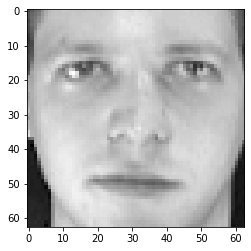

In [33]:
plt.imshow(A_1, cmap="gray"); #image 1

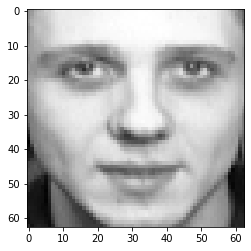

In [34]:
plt.imshow(A_2, cmap="gray"); #image 2

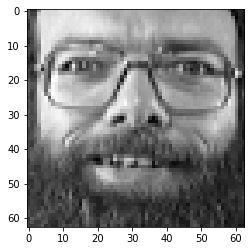

In [36]:
plt.imshow(A_3, cmap="gray"); #image 3

## Q3-Part b
We will now extract patches from the images in [row-major order](https://en.wikipedia.org/wiki/Row-_and_column-major_order). The patches should ***not*** overlap. Partitioned this way, each image comprises ${81}$ patches. We will ***flatten*** each patch and ***stack*** them vertically to ***create*** a transformed version of these images, respectively named ${B_1}$, ${B_2}$, and ${B_3}$, each with dimensions ${81 x 49}$.

**Hint 1**: numpy arrays have a built-in function called *flatten()* that can be used to create a ${1-}$D vector from a matrix. You can reverse it with *np.reshape(your_array, (dimensions))*. Both assumes row-major order unless otherwise specified.

**Hint 2**: It would be wise to first create functions that create ${B_1}$ when given ${A_1}$, and create ${A_1}$ when given ${B_1}$. See **Code Snippet 2** for an example.

In [37]:
def create_patches(mtr):
    first = np.empty((1,49))
    for i in range(9):   #iterating vertically
        for j in range(9):  #iterating horizontally
            first = np.vstack((first,np.expand_dims(mtr[7*i:7*i+7,7*j:7*j+7].flatten(),0)))  #taking 7x7 frames and flattening to stack
    return first[1:,:] #returning all but first row

The patch can be visualized as,

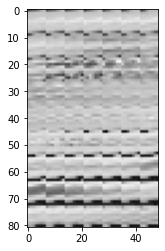

In [38]:
B_1 = create_patches(A_1)
plt.imshow(B_1, cmap="gray")

In [39]:
def create_face(mtr):
    first = np.empty((1,63))
    for i in range(9): #iteration of resultant columns
        face = mtr[9*i,:].reshape((7,7)) #beginning in the row major order
        for j in range(8): #iteration of resultant rows
            face = np.hstack((face, mtr[9*i+j+1,:].reshape((7,7)))) #adding frames horizontally
        first = np.vstack((first, face)) #adding strips vertically
    return first[1:,:] #returning all but first row

The inverse image can be seen as,

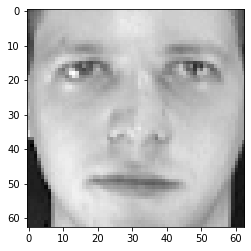

In [40]:
plt.imshow(create_face(B_1), cmap="gray")

## Q3-Part c
Conduct an **SVD** to obtain the factorization ${B_1 = U_1\Sigma_1 V_1^T}$. **Print** the *first 10* singular values. 

**Hint**: You may use *numpy.linalg.svd* here, but make sure you interpret the output correctly. You may or may not want to use the parameter *full_matrices* depending on your approach.

The *first 10* singular values are,

In [41]:
B_U, B_S, B_V = np.linalg.svd(B_1) #performing SVD as the singular values are ordered
print(B_S[:10])

[41.16334656  3.83938243  1.99439961  1.3196773   1.183775    0.97274167
  0.85728607  0.71252501  0.67311105  0.61996824]


## Q3-Part d
In this setting, what does the columns of ${V_1}$ correspond to? ***Comment***. ***Show*** the *first three* columns of ${V_1}$ as ${7 x 7}$ images. Are they interpretable? ***Interpret*** at least some of them. 

**Hint**: The colors are meaningful in a relative sense since these values can be scaled or negated when the full matrix is being reconstructed.

The columns of ${V_1}$ means the rows of ${V_1^T}$ which is given by the algorithm as ${B_V}$ in the case of this study. Hence, it would be correct to comment on and print the rows of the ${B_V}$.

These columns are the **right singular vectors** and the orthonormal **eigenvectors** of the matrix ${B_1B_1^T}$. In the ***Theorem of Singular Value Decomposition***, ${v_i}$s constitute an orthonormal basis which when multiplied with the original matrix, in this case ${B_1}$, they are still orthogonal to each other. What multiplying with the original matrix ${B_1}$ does is to scale or somehow enlarge these vectors as much as possible. Hence, it can be said that these vectors are ordered on the basis of the amount of the information they might provide once they have been interacted (multiplied with) the original matrix ${B_1}$. From the perspective of the **Singular Value Decomposition**, the first singular vector is the vector is the one that can approximate the structure and the work of the original matrix of ${B_1}$ the best. 

With this setting, there is an introduced additional complexity in the problem because of the mapping between the original image and the **patched version** used for this decomposition. It can be stated that the **Singular Value Decomposition** applied on the images act as similar to a feature detector, detecting the important characteristics of the image and partitioning them to different vectors while ensuring that those vectors carry as much information about the features as possible. Mapping from the original image (${A_1}$) to the *patched version* (${B_1}$) resembles a change in storage of those characteristics. In other words, pixels are grouped and arranged in ${B_1}$ different than that of ${A_1}$, this might have helped with maintaining the structure of the image by introducing somewhat a higher order secondary pixeling via grouping and processing the information coming from close pixels in a batched manner. This helps with finding a better and more understandable structure as in **Part e**, on the first order approximation there is only one kind of information within each pixel. To illustrate this simple situation, the image is ***approximated with rank 1*** using **SVD** on the non-patched version and the patched one,

Text(0.5, 1.0, 'Without Patching')

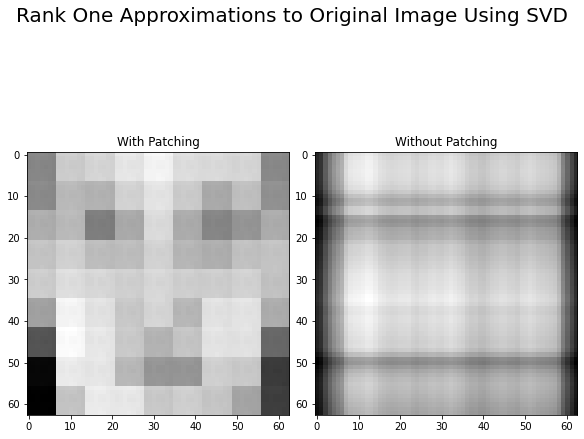

In [42]:
def approx_face(U, Sig, V, rank):
    tmp = np.zeros((81,49)) #patched version
    for i in range(rank): #going till rank
        tmp += np.expand_dims(U[:,i],1)@np.expand_dims(V[i,:].T,0)*Sig[i] #approximating the patched matrix
    return create_face(tmp)

def approx_face1(U, Sig, V, rank):
    tmp = np.zeros((63,63)) #unpatched version
    for i in range(rank): #going till rank
        tmp += np.expand_dims(U[:,i],1)@np.expand_dims(V[i,:].T,0)*Sig[i] #approximating the direct SVD
    return tmp

one,two,thr = np.linalg.svd(A_1) #SVD without patching
fig, ax = plt.subplots(1,2,figsize=(8,8), constrained_layout=True)
fig.suptitle("Rank One Approximations to Original Image Using SVD", size=20, y=0.98)

ax[0].imshow(approx_face(B_U, B_S, B_V, 1),cmap="gray")
ax[0].set_title("With Patching")
ax[1].imshow(approx_face1(one,two,thr,1), cmap="gray")
ax[1].set_title("Without Patching")

Hence with this understanding, it can be said that the columns of ${V_1}$ hold the most important information about the inner structure of those higher order (${7 x 7}$) pixels in the image. With more and more rank added to the approximations, the structure within each higher order pixel becomes more and more complex, going from an overall shade to changing vertical shades, then to added horizontal shading etc. with each next approximation.

It is also interesting and related to the scaling of colors that the variance of the first column of ${V_1}$ is much smaller compared to the next. The fact that the entries of this first column is very close together helps with averaging the tone of this higher order ${7 x 7}$ pixel. After the second column more variety starts within the columns and this corresponds to the added features, complexity and differentiation to the approximations. This situation can be illustrated by comparing the variances of the three columns,

In [43]:
np.var(B_V[0,:]) #variance of the first column

1.0864971355105072e-06

In [44]:
np.var(B_V[1,:]) #variance of the second column

0.02040805647453342

In [45]:
np.var(B_V[2,:]) #variance of the third column

0.02040812319165268

After this, when first column on ${V_1}$ is visualized,

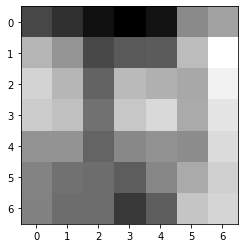

In [46]:
plt.imshow(B_V[0,:].reshape((7,7)), cmap="gray") #first column of V

This is first column holds the most dominant information about the higher order pixels of the image such that when multiplied with the first column ${U_1}$ and the first singular value, those are scaled and amplified to create the best possible first order approximation consisting of the ${81}$ patches of ${1}$ color.

The second column can be visualized as,

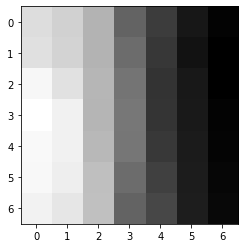

In [47]:
plt.imshow(B_V[1,:].reshape((7,7)), cmap="gray")

This column holds the second most important features of the patches of the original image. Hence when multiplied with the second left singular vector and the second singular value and added on the first approximation, a second kind of information or a new rank is added on the approximated image of the face. The column holds the most possible amount of data that can be added to the patches once scaled with the ${U}$ and ${\Sigma}$. 

The same situation holds for the successor columns and the third column can be visualized as,

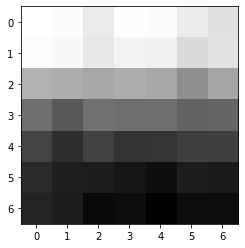

In [48]:
plt.imshow(B_V[2,:].reshape((7,7)), cmap="gray")

## Q3-Part e
Using your decomposition, ***create*** a rank${-1}$, rank${-5}$, rank${-10}$, and rank${-20}$ approximation of ${B_1}$. ***Convert*** each approximation back to its face-shape and ***display*** each of them as face images.

The smallest possible approximation is,

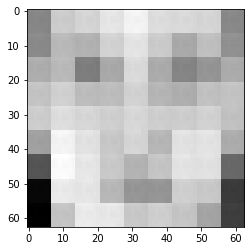

In [49]:
plt.imshow(approx_face(B_U, B_S, B_V, 1),cmap="gray")

Which is interesting because making face out of this approximation seems to capture the most important outlines of the image, in a sense it is clear that even with the first approximation the image features a face. Nevertheless, there are no extra details and the image almost looks like the face of a regular minecraft character.

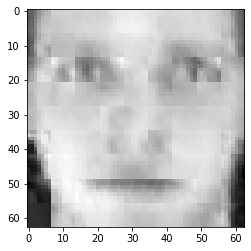

In [50]:
plt.imshow(approx_face(B_U, B_S, B_V, 5),cmap="gray")

From the ${5^{th}}$ degree approximation, the facial details and features of the image has become more prominent. There could be many compressions and approximations to this image which might at the end give the actual face. Nevertheless, it is very interesting that **SVD** literally orders the approximations by adding the most prominent features sequentially. This is actually related to the ordering of **singular values**.

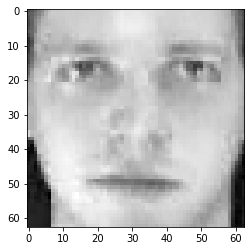

In [51]:
plt.imshow(approx_face(B_U, B_S, B_V, 10),cmap="gray")

The details and expression of the face is very much visible and the image looks like a low resolution normal photograph.

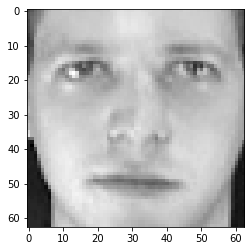

In [52]:
plt.imshow(approx_face(B_U, B_S, B_V, 20),cmap="gray")

The approximations can go until ${49^{th}}$ order. Nonetheless, it shows the power and efficiency of the **Singular Value Decomposition** that, even at the ${20^{th}}$ approximation, not even the half way on the road, the image seems very smooth and almost identical to the actual image of the face.

## Q3-Part f
Notice that when we obtain, for example, a rank-5 approximation of ${B_1}$, we actually do not have to store all elements of ${U}$ and ${V}$ but *only the first five columns*. This means a reasonably faithful approximation could actually save us a lot of space. Imagine we are using a sparse representation (we only have to store non-zero elements). Given that we are using ${63 x 63 = 3969}$ parameters to store the original image, **what fraction of parameters** do we have to store for each of the approximations above compared to the original images parameters? **Are we saving space** with the approximations above?

To generalize for a ***rank k approximation*** to an ${m x n}$ matrix there are,

${k}$ column vectors coming from ${m x m}$ ${U}$ matrix, ${k}$ left singular vectors

${k}$ entries coming from ${\Sigma}$, ${k}$ singular values

${k}$ row vectors coming from ${n x n}$ ${V^T}$ matrix, ${k}$ right singular vectors

By ${U}$ there are ${m x k}$ entries, by ${\Sigma}$ there are ${k}$ entries and by ${V^T}$ there are ${k x n}$ entries which amount up to,

${k (m + n + 1)}$ entries

Of the actual ${m x n}$ pixels, for each ***rank k approximation*** the **fraction** is,

${\frac{k (m + n + 1)}{m x n}}$

For **rank 1 approximation** ${k = 1}$,

${Frac_1 = \frac{m + n + 1}{m x n} = \frac{81 + 49 + 1}{81 x 49} = \frac{131}{3969} = 0.033 = 3.3\%}$

For **rank 5 approximation** ${k = 5}$,

${Frac_5 = \frac{5m + 5n + 5}{m x n} = \frac{405 + 245 + 5}{81 x 49} = \frac{655}{3969} = 0.165 = 16.5\%}$

For **rank 10 approximation** ${k = 10}$,

${Frac_{10} = \frac{10m + 10n + 10}{m x n} = \frac{810 + 490 + 10}{81 x 49} = \frac{1310}{3969} = 0.330 = 33.0\%}$

For **rank 20 approximation** ${k = 20}$,

${Frac_{20} = \frac{20m + 20n + 20}{m x n} = \frac{1620 + 980 + 20}{81 x 49} = \frac{2620}{3969} = 0.660 = 66.0\%}$

As visualized in **Q3-e**, the approximations with rank 10 and 20 are good enough to to obtain the characteristics of the face. It can be seen from the formula mentioned that the amount of information carried is a direct linear function of the approximation order. Hence, between ${10}$ and ${20}$, there can be found an ***optimal k value*** for which the reconstruction of the image is still clear and the amount of parameters hold is small can be found. Yes, there is space saved by this compression.

## Q3-Part g
We will now use the results of the SVD of ${A_1}$ to decompose the other images. *Take only the first 20 columns* of ${V_1}$ and call this matrix ${V_{1, (20)}}$. Observe the linear systems ${B_2 = Y_2V_{1, (20)}^T}$ and ${B_3 = Y_3V_{1, (20)}^T}$, where ${V_{1, (20)}}$ stands in for ${V_2}$ and ${V_3}$, and ${Y_2}$ and ${Y_3}$ stand in for ${U_2\Sigma_2}$ and ${U_3\Sigma_3}$. *Find* the **best** values of ${Y_2}$ and ${Y_3}$, and call them ${\hat Y_2}$ and ${\hat Y_3}$. Finally, *compute* the approximations to ${B_2}$ and ${B_3}$ by computing ${\hat Y_2V_{1, (20)}^T}$ and ${\hat Y_3V_{1, (20)}^T}$, *convert* them to original shape and *show* these approximations as images. Did these approximations work? **Why**? Which one worked better? **Why**?

The **best** values to ${\hat Y_2}$ and ${\hat Y_3}$ are approximations to the original ${U_2\Sigma_2}$ and ${U_3\Sigma_3}$. These best values can be found by performing **least squares** by,

${B_2 = Y_2V_{1,(20)}^T}$

As ${V_1}$ is an **orthonormal matrix** ${V_1^TV_1 = I_{(49x49)}}$ as shown by,

In [53]:
np.sum(np.round(B_V.T[:,0:20].T@B_V[0:20,:].T - np.eye((20)),10))

0.0

Therefore,

${B_2V_{1,(20)} \approx Y_2V_{1,(20)}^TV_{1,(20)}}$

Hence,

${B_2V_{1,(20)} \approx Y_2}$ so ${\hat Y_2 = B_2V_{1,(20)}}$ **same** holds for ${\hat{Y}_3}$ with ${B_3}$ as ${\hat Y_3 = B_3V_{1,(20)}}$

In [54]:
#gathering the patches
B_2 = create_patches(A_2)
B_3 = create_patches(A_3)

#performing SVD for future comparison
U_2, S_2, V_2 = np.linalg.svd(B_2)
U_3, S_3, V_3 = np.linalg.svd(B_3)

In [55]:
#finding approximations
Yapp_2 = B_2@B_V[0:20,:].T
Yapp_3 = B_3@B_V[0:20,:].T

When the approximate images are found using ${\hat Y_2}$ and ${\hat Y_3}$ and plotted,

Text(0.5, 1.0, 'Psuedo')

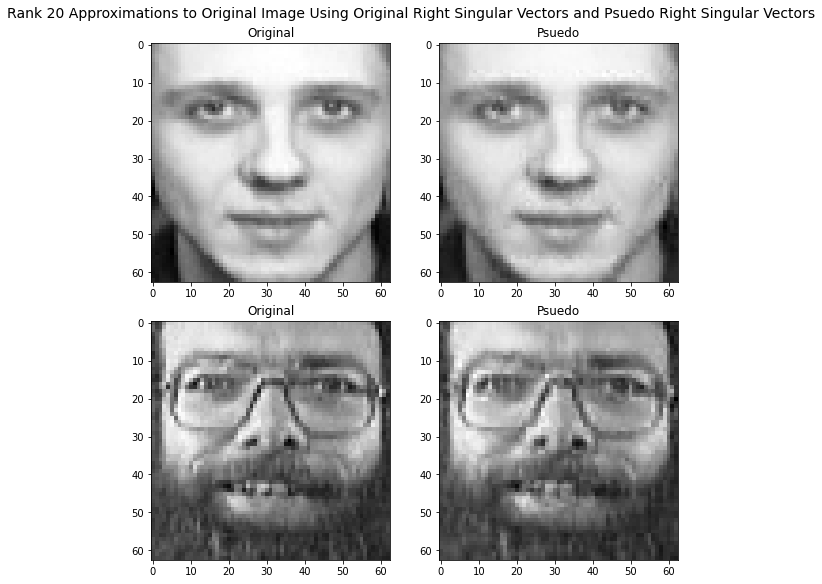

In [56]:
fig, ax = plt.subplots(2,2,figsize=(8,8), constrained_layout=True)
fig.suptitle("Rank 20 Approximations to Original Image Using Original Right Singular Vectors and Psuedo Right Singular Vectors", size=14)

ax[0,0].imshow(approx_face(U_2, S_2, V_2, 20), cmap="gray")
ax[0,1].imshow(create_face(Yapp_2@B_V.T[:,0:20].T), cmap="gray")
ax[1,0].imshow(approx_face(U_3, S_3, V_3, 20), cmap="gray")
ax[1,1].imshow(create_face(Yapp_3@B_V.T[:,0:20].T), cmap="gray")
ax[0,0].set_title("Original")
ax[0,1].set_title("Psuedo")
ax[1,0].set_title("Original")
ax[1,1].set_title("Psuedo")

It can be seen that the original right singular vectors are showing better performance in approximating the image. Nevertheless, the right singular vectors coming from ${V_1}$ are now so bad at this task either surprisingly. A part of this performance is attributable to the fact that the best possible ${\hat Y}$s are chosen for approximation by using the information that is actually coming from the patched versions of the original images.

There could be other reasons as well. When the stem-plots of the first three right singular vectors are illustrated,

Text(0.5, 1.0, 'Third Vector of V_3')

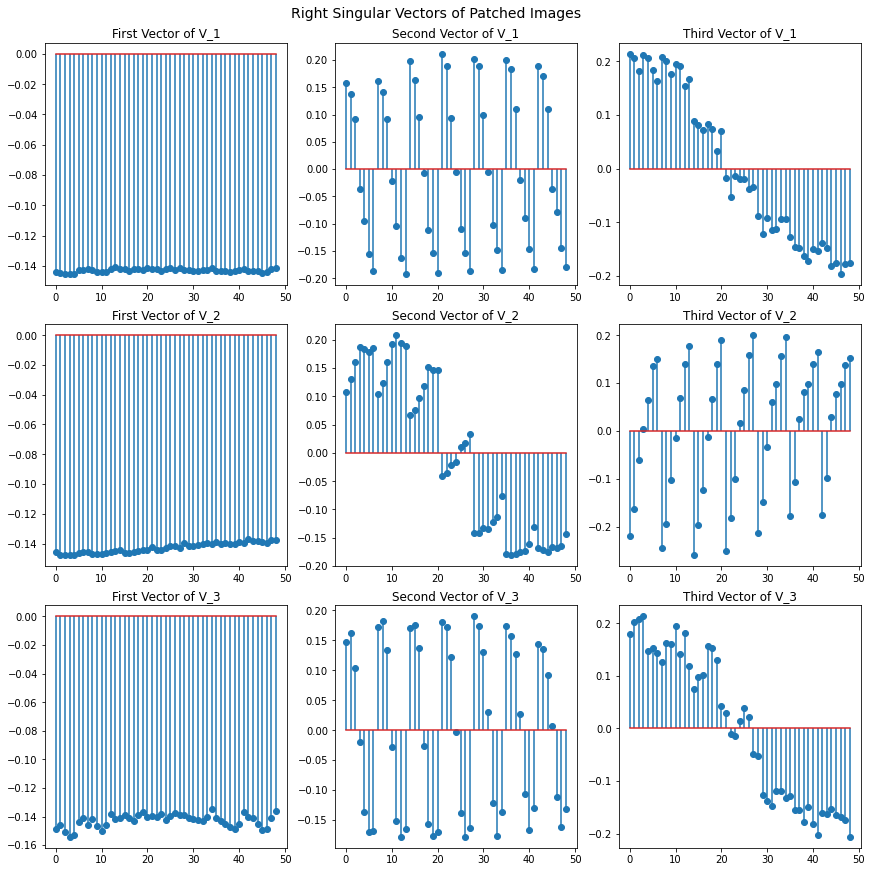

In [60]:
fig, ax = plt.subplots(3,3,figsize=(12,12), constrained_layout=True)
fig.suptitle("Right Singular Vectors of Patched Images", size=14)

ax[0,0].stem(B_V[0,:])
ax[0,1].stem(B_V[1,:])
ax[0,2].stem(B_V[2,:])
ax[1,0].stem(V_2[0,:])
ax[1,1].stem(V_2[1,:])
ax[1,2].stem(V_2[2,:])
ax[2,0].stem(V_3[0,:])
ax[2,1].stem(V_3[1,:])
ax[2,2].stem(V_3[2,:])
ax[0,0].set_title("First Vector of V_1")
ax[0,1].set_title("Second Vector of V_1")
ax[0,2].set_title("Third Vector of V_1")
ax[1,0].set_title("First Vector of V_2")
ax[1,1].set_title("Second Vector of V_2")
ax[1,2].set_title("Third Vector of V_2")
ax[2,0].set_title("First Vector of V_3")
ax[2,1].set_title("Second Vector of V_3")
ax[2,2].set_title("Third Vector of V_3")

It is obvious that the patterns in these first few vectors are similar to each other. As mentioned before, those right singular vectors help holding the most important information coming from each higher dimensional ${7 x 7}$ pixel. Therefore, for example the variance within the first singular vector is very low because it acts as a average tone giver for each of these ${7 x 7}$ pixels. The next singular vectors show similar patterns, though sometimes with different ordering, because they all correspond to some basic structure of the facial features, such as the eyeballs, nose holes and boundaries of eyebrows. Because all pictures are human faces, it can be said that they are somehow within the proximity of each other in the higher space of all possible images. This is because all faces have some basic properties that helps people or computers classify them as face. Thererfore, it can be stated that ${V_1}$ is not fundamentally different than ${V_2}$ and ${V_3}$ especially in their first few vectors as all function as a detector and carrier of the most principal features of the human face.

From the plot, it can be seen with some effort that the approximation to ${\hat Y_2}$ image is better compared to those to ${\hat Y_3}$ image. This could be the situation because there is actually a ${2^{nd}}$ order approximation to the images and the first image is more smooth, carrying less amount of details, complexity and information. This might have made it easier to approximate the first image using a matrix that does not actually belong to it. Moreover, the first image is more similar to the actual image of which right singular vectors are used in approximation. If a logic similar to the notion of the proximity of human face images in all images space is formed, than the performance of the approximation being better can be understood.

# References

[Numpy Documentation](https://numpy.org/doc/stable/contents.html)

[Fancy Arrow Class Code in 3-D](https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c)

# Appendices

## Code Snippet 1

In [2]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
A_1 = faces["images"][0][:63, :63]
A_2 = faces["images"][110][:63, :63]
A_3 = faces["images"][365][:63, :63]

## 3-D Arrow Code

In [3]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs
        
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)